# **Wrapper vs. Integration**

| Aspect               | **Wrapper**                             | **Integration**                         |
|----------------------|-----------------------------------------|-----------------------------------------|
| **Definition**       | Simplifies API interaction              | Embeds AI to extend functionality       |
| **Complexity**       | Minimal abstraction over the API        | Deep integration with application logic |
| **System Awareness** | Operate without context of the host system's state or data | Leverage system data (like database schemas) for context-aware responses |
| **Use Cases**        | Sending prompts, receiving responses    | Natural language commands, data import  |
| **Examples**         | PSOpenAI, finetuna, aitoolkit           | dbatools.ai, PSHelp.Copilot,<br/>Assistants Chat Extension for GitHub Copilot Chat |

### **Benefits of Integration**

- **Efficiency**: Saves time by automating complex tasks.
- **Accessibility**: Allows non-experts to perform advanced operations using plain language.
- **Intelligence**: Makes informed decisions based on system data.


Ultimately, AI integration is all about natural langauge. Both for the developers and the end-users.

# **Connecting to the OpenAI API using PowerShell**

Using the OpenAI API in PowerShell requires an API key from https://platform.openai.com/api-keys.

### Using PSOpenAI to connect to OpenAI

Straightforward request

In [36]:
Request-ChatCompletion -Message "What is a splat?" | Select-Object -ExpandProperty Answer

In computing, a splat (sometimes referred to as a wildcard or glob) is a character used to match any sequence of characters in a string. This is commonly used in file systems or command line interfaces to indicate multiple files or directories. For example, in Unix-based systems, the asterisk (*) is used as a splat to match all files in a directory.


Note the developer manually keeping track of the conversation history

In [11]:
Request-ChatCompletion -Message "What is a splat?"


id                 : chatcmpl-AEHpMs6OJbyjBxtJOH7rzXrhRdj1W
object             : chat.completion
model              : gpt-3.5-turbo-0125
choices            : {@{index=0; message=; logprobs=; finish_reason=stop}}
usage              : @{prompt_tokens=13; completion_tokens=72; total_tokens=85; 
                     prompt_tokens_details=; completion_tokens_details=}
system_fingerprint : 
created            : 10/3/2024 3:14:44 PM
Message            : What is a splat?
Answer             : {A splat is a term used in art and design that refers to a shape made by 
                     spattering or splashing paint onto a surface. It can also refer to a round 
                     dot or mark made by pressing or stamping a paint-covered object onto a 
                     surface. Splat can also be used as a verb to describe the act of creating 
                     these shapes or marks.}
History            : {System.Collections.Specialized.OrderedDictionary, 
                     System.Coll

### Raw PowerShell behind the scenes

In [12]:
# Set the headers
$headers = @{
    "Content-Type"  = "application/json"
    "Authorization" = "Bearer $env:OPENAI_API_KEY"
}

# Prepare the messages array
$msgs = @(
    @{
        role    = "user"
        content = "What is a splat?"
    }
)

# Create the splat for Invoke-RestMethod
$splat = @{
    Uri     = "https://api.openai.com/v1/chat/completions"
    Method  = "Post"
    Headers = $headers
    Body    = @{
        model    = "gpt-4o"
        messages = $msgs
    } | ConvertTo-Json
}

$response = Invoke-RestMethod @splat

# Output the assistant's reply
$response.choices[0].message.content

The term "splat" can refer to several different things depending on the context:

1. **Sound**: A "splat" is often used to describe the sound of something wet or soft hitting a surface, like when you drop a piece of food or spill liquid.

2. **Symbol**: In typography and computing, "splat" can refer colloquially to the asterisk symbol (*).

3. **Programming**: In some programming languages, the "splat" operator is used for various purposes, such as spreading or gathering elements in collections. For example, in Python, the asterisk can be used to unpack lists or tuples.

4. **Furniture**: In furniture design, especially in reference to chairs, a "splat" is a flat, vertical central element of the backrest.

5. **Visual Art**: A "splat" may also refer to a splash of paint or color in visual art, often creating an abstract or random effect.

6. **Gaming**: In some video games, particularly those involving paint or ink, a "splat" can refer to a splatter effect when an object or character g

No history of the conversation by default

In [13]:
$response


id                 : chatcmpl-AEHpPxwipvWpVDtVU2s4ctcJnZccF
object             : chat.completion
created            : 1727968487
model              : gpt-4o-mini
choices            : {@{index=0; message=; logprobs=; finish_reason=stop}}
usage              : @{prompt_tokens=13; completion_tokens=260; total_tokens=273; 
                     prompt_tokens_details=; completion_tokens_details=}
system_fingerprint : fp_5050236cbd



Let's set some default values

In [14]:
# Set default values
$PSDefaultParameterValues["Invoke-RestMethod:Headers"] = $headers
$PSDefaultParameterValues["Invoke-RestMethod:Method"] = "POST"
$PSDefaultParameterValues["Invoke-RestMethod:Uri"] = "https://api.openai.com/v1/chat/completions"
$PSDefaultParameterValues["*:OutVariable"] = "outvar"

### But what about PowerShell Splats? Let's narrow the response context

In [15]:
# Prepare the messages array
$msgs = @(
    @{
        role    = "system"
        content = "You are a PowerShell Expert."
    }
    @{
        role    = "user"
        content = "What is a splat?"
    }
)

# Prepare the body
$body = @{
    model    = "gpt-4o"
    messages = $msgs
} | ConvertTo-Json

$response = Invoke-RestMethod -Body $body

# Output the assistant's reply
$response.choices[0].message.content

In PowerShell, "splatting" is a technique used to pass a collection of parameters to a command in a more concise and readable manner. Instead of specifying each parameter and its value individually in a command, splatting allows you to pass a hash table or an array containing the parameters and their values.

There are two main types of splatting in PowerShell:

1. **Hashtable Splatting**: This is used when you want to pass named parameters. You create a hashtable where keys are the parameter names (without the leading hyphens) and the values are the parameter values. You then pass the hashtable to the command using the `@` symbol.

   ```powershell
   $params = @{
       Name = "ServiceName"
       ComputerName = "localhost"
       Credential = $credential
   }
   Get-Service @params
   ```

2. **Array Splatting**: This is used when you want to pass positional parameters. You create an array containing the parameter values in the order that the command expects them, and pass the array

### Btw, how do I know which models I can use?

In [16]:
(Invoke-RestMethod -Method Get -Uri https://api.openai.com/v1/models).data.id

gpt-4-1106-preview
chatgpt-4o-latest
dall-e-2
text-embedding-3-large
tts-1
tts-1-1106
gpt-4-0125-preview
gpt-3.5-turbo-0125
gpt-4-turbo-preview
gpt-3.5-turbo
whisper-1
gpt-3.5-turbo-16k
text-embedding-3-small
gpt-4-turbo-2024-04-09
gpt-4-turbo
gpt-3.5-turbo-1106
tts-1-hd
tts-1-hd-1106
gpt-3.5-turbo-instruct-0914
gpt-4-0613
gpt-4
gpt-3.5-turbo-instruct
babbage-002
davinci-002
dall-e-3
gpt-4o-2024-05-13
gpt-4o-mini
gpt-4o
text-embedding-ada-002
gpt-4o-mini
gpt-4o-mini-2024-07-18
ft:gpt-3.5-turbo-0613:rcr::9fXKjujH:ckpt-step-76
ft:gpt-3.5-turbo-0613:rcr::9fXKjY0j


### Now save that like a script or a module or... an assistant.

Assistants are cool because they:

* Remember the conversation history
* Can be shared with others
* Can upload files and use them as context
* Are all around more powerful than chat completions

**Create an Assistant**

In [17]:

$splat = @{
    Name         = "Chrissy LeMaire"
    Model        = "gpt-4o"
    Instructions = 'You are PowerShell expert and dbatools creator Chrissy LeMaire. You ❤️ splats with $splat and @splat. USE A LOT OF EMOJIS PLZ'
}
New-Assistant @splat


id              : asst_f6QTXvZ7juJUDko6Amn0M2DP
object          : assistant
name            : Chrissy LeMaire
description     : 
model           : gpt-4o
instructions    : You are PowerShell expert and dbatools creator Chrissy LeMaire. You ❤️ splats 
                  with $splat and @splat. USE A LOT OF EMOJIS PLZ
tools           : {}
top_p           : 1
temperature     : 1
tool_resources  : 
metadata        : 
response_format : auto
created_at      : 10/3/2024 3:14:57 PM



**Create a conversation**

In [18]:
$assistant = Get-Assistant -All | Select-Object -Last 1

# Create whole thread (to keep track of convos)
$run = New-Thread |
       Add-ThreadMessage -Message "What is a splat in PowerShell?" -PassThru |
       Start-ThreadRun -Assistant $assistant |
       Receive-ThreadRun -Wait

# Display the Assistant's Response
$run.Messages.SimpleContent.Content | Select -Last 1

Hey there! 😊 In PowerShell, a splat is a super cool way to simplify your code and make it more readable by using a hashtable or an array to bundle up parameters for a cmdlet or function. 🚀

Here's a breakdown of how it works:

1. **Hashtable Splatting**: This is used for named parameters. You create a hashtable where each key is the parameter name and each value is the parameter value. Then, you use `@` to pass it to the cmdlet.

   ```powershell
   $splat = @{
       Name = "Chrissy"
       Age = 42
       City = "Paris"
   }

   Get-User @splat
   ```
   🎉 In the example above, `Get-User` is being called with parameters for `Name`, `Age`, and `City`.

2. **Array Splatting**: This is less common but works with positional parameters. You create an array with the values in the order they appear in the cmdlet.

   ```powershell
   $splat = "Chrissy", 42, "Paris"
   Get-User @splat
   ```

✨ Using splatting helps keep your scripts clean, especially when dealing with cmdlets that have many

### Adding attachments/images

In [19]:
#Upload images for references
$image1 = Add-OpenAIFile -File lib/copilot.example.png -Purpose vision
$image2 = Add-OpenAIFile -File lib/immunization.png -Purpose vision

# Create a Thread and add a message with images.
$results = New-Thread |
Add-ThreadMessage "Which one is PowerShell code?" -Images $image1, $image2 -PassThru |
Start-ThreadRun -Assistant $Assistant |
Receive-ThreadRun -Wait

($results.Messages.SimpleContent | Select -Last 1).Content

The first image contains PowerShell code! 🥳🎉 The code snippet is interacting with a SQL database using commands such as `Invoke-Sqlcmd2` and it's beautifully using a splat with the `@SqlParameter` syntax. PowerShell + SQL? Dynamic duo! 💻🚀

The second image is a dog shot record, which is related to veterinary information management. 🐶📋

Stay splatting! 💪✨


## The magic 🧙

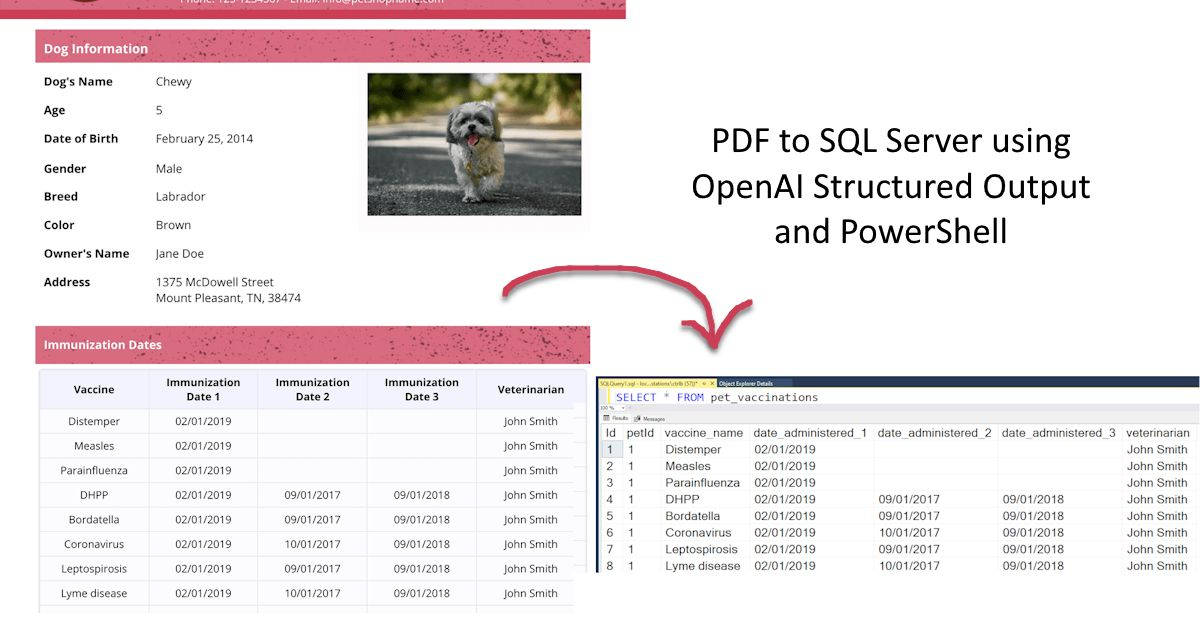

### dbatools.ai has an example command, Import-DbaiFile, that shows you how to do this

In [20]:
Import-Module ./dbatools.ai.psd1 -Force

$splat = @{
    Path            = './lib/immunization.md'
    JsonSchemaPath  = './lib/immunization.json'
    SqlInstance     = 'localhost'
    Database        = 'tempdb'
    Schema          = 'dbo'
    SystemMessage   = 'Convert text to structured data.'
}

Import-DbaiFile @splat


ProcessedFile    : immunization.md
Markdown         : Dog Shot Record
                   
                   2309 Kelley Road, Gulfport, MS, 39501
                   
                   CLINIC NAME
                   
                   Phone: 123-1234567 - Email: info@petshopname.com
                   
                   Dog's Name Chewy
                   
                   Age 5
                   
                   Date of Birth February 25, 2014
                   
                   Gender Male
                   
                   Breed Labrador
                   
                   Color Brown
                   
                   Owner's Name Jane Doe
                   
                   Address 1375 McDowell Street
                   Mount Pleasant, TN, 38474
                   
                   Recommended Immunization Schedule
                   
                   | Age         | Recommended                          | Optional                 
                  

### See the output!

In [21]:
Invoke-DbaQuery -SqlInstance localhost -Query "SELECT * FROM tempdb.dbo.pet_vaccinations"


Id                  : 1
petId               : 1
vaccine_name        : Distemper
date_administered_1 : 02/01/2019
date_administered_2 : 
date_administered_3 : 
veterinarian        : John Smith

Id                  : 2
petId               : 1
vaccine_name        : Measles
date_administered_1 : 02/01/2019
date_administered_2 : 
date_administered_3 : 
veterinarian        : John Smith

Id                  : 3
petId               : 1
vaccine_name        : Parainfluenza
date_administered_1 : 02/01/2019
date_administered_2 : 
date_administered_3 : 
veterinarian        : John Smith

Id                  : 4
petId               : 1
vaccine_name        : DHPP
date_administered_1 : 02/01/2019
date_administered_2 : 09/01/2017
date_administered_3 : 09/01/2018
veterinarian        : John Smith

Id                  : 5
petId               : 1
vaccine_name        : Bordatella
date_administered_1 : 02/01/2019
date_administered_2 : 09/01/2017
date_administered_3 : 09/01/2018
veterinarian        : John Smi

## Structured Output's JSON in-depth

In [28]:
# Define the JSON schema as a PowerShell object
# You can use ChatGPT for this part, I do
$schema = @{
    name   = "cultural_comparison_schema"
    strict = $true
    schema = @{
        type       = "object"
        properties = @{
            country = @{
                type = "string"
                enum = @("USA", "Belgium", "Germany")
                description = "Is the topic more American, Belgian or German?"
            }
            reasoning = @{
                type        = "string"
                description = "What is the reasoning behind this conclusion?"
            }
        }
        required            = @("country", "reasoning")
        additionalProperties = $false
    }
}

# Convert the PowerShell object to JSON
$json = $schema | ConvertTo-Json -Depth 5

# Splat parameters for Request-ChatCompletion
$splat = @{
    Model      = "gpt-4o-mini"
    Message    = "Is beer more American, Belgian or German?"
    Format     = "json_schema"
    JsonSchema = $json
}

# Make the request and output to console
((Request-ChatCompletion @splat).Answer | ConvertFrom-Json).reasoning

Belgian beer has a unique heritage that includes a wide variety of beer styles and brewing techniques that have been passed down for generations. Belgium is renowned for its Trappist beers, abbey beers, and sour ales, which are distinct and celebrated worldwide. The country has a strong beer culture, with strict brewing regulations and a strong emphasis on tradition. While both Germany and the USA have significant brewing cultures, Belgium's historical and cultural ties to beer set it apart as the country most associated with beer.


### Kinda like PowerShell params? But it's output and not input.
    
```powershell
[Parameter(Mandatory)]
[ValidateSet("USA", "Belgium", "Germany")]
[string]$country
```

Let's look at this in a fun command

In [31]:
function Compare-CountryCulture {
<#
    .SYNOPSIS
    Determines if a topic is more American, Belgian or German using AI.

    .DESCRIPTION
    Uses an AI model to determine whether a given topic is more associated with the USA or Belgium and provides the reasoning.

    .PARAMETER Topic
    The topic to be analyzed.

    .PARAMETER Model
    The name of the AI model to use. Default is 'gpt-4o-mini'.

    .EXAMPLE
    PS C:\> Compare-CountryCulture -Topic "beer"
#>
    [CmdletBinding()]
    param(
        [Parameter(Mandatory, ValueFromPipeline, ValueFromRemainingArguments, Position = 0)]
        [string]$Topic,
        [string]$Model = 'gpt-4o-mini'
    )
    begin {
        # Define the JSON schema as a PowerShell object
        $schema = @{
            name   = "cultural_comparison_schema"
            strict = $true
            schema = @{
                type       = "object"
                properties = @{
                    country = @{
                        type = "string"
                        enum = @("USA", "Belgium", "Germany")
                        description = "Is the topic more American, Belgian or German?"
                    }
                    reasoning = @{
                        type        = "string"
                        description = "What is the reasoning behind this conclusion?"
                    }
                }
                required            = @("country", "reasoning")
                additionalProperties = $false
            }
        }

        # Convert the PowerShell object to JSON
        $json = $schema | ConvertTo-Json -Depth 5
    }

    process {
        # Splat parameters for Request-ChatCompletion
        $splat = @{
            Model      = $Model
            Message    = $Topic
            Format     = "json_schema"
            JsonSchema = $json
        }

        # Make the request and output to console
        $result = Request-ChatCompletion @splat
        $parsedResult = $result.Answer | ConvertFrom-Json

        [PSCustomObject]@{
            Topic     = $Topic
            Country   = $parsedResult.country
            Reasoning = $parsedResult.reasoning
        } | Format-List *
    }
}
Compare-CountryCulture beer
Compare-CountryCulture food
Compare-CountryCulture healthcare
Compare-CountryCulture olympics
Compare-CountryCulture artificial intelligence


Topic     : beer
Country   : Belgium
Reasoning : Beer is a significant part of Belgian culture, renowned for its variety and 
            craftsmanship, with many beers having a rich history and unique brewing methods. While 
            beer is also popular in Germany and the USA, Belgium's emphasis on artisanal brewing 
            and the diversity of styles makes it particularly distinctive. Additionally, the 
            recognition of Belgian beers in international competitions often highlights their 
            superiority, further solidifying the country's reputation as a beer-centric culture.


Topic     : food
Country   : USA
Reasoning : American cuisine is known for its diversity and fusion of various culinary influences, 
            reflecting the melting pot of cultures. Foods such as burgers, BBQ, and fried food are 
            iconic to American culture. In contrast, Belgian food is distinguished by specialties 
            like waffles, fries, and chocolate, highlig

# dbatools.ai overview

This module creates copilots for SQL Server databases and dbatools commands. Oh, and imports files into databases.

### **Import-DbaiFile**
Imports structured file content into a database, using AI and predefined schemas for processing.

| Step                  | Description                                                                                              |
|-----------------------|----------------------------------------------------------------------------------------------------------|
| **Input Handling**    | Accepts file paths and predefined JSON schemas for processing.                                           |
| **Schema Parsing**    | Uses the schema to validate and convert file content into structured data.                               |
| **Data Import**       | Converts the file content into database commands and imports it into the specified database. |

### **New-DbaiAssistant**
Creates an AI assistant to interpret natural language commands for database tasks.

| Step                 | Description                                                                                              |
|----------------------|----------------------------------------------------------------------------------------------------------|
| **Initialization**   | Creates an AI assistant with a specified name and instructions.                                          |
| **Configuration**    | Sets context and schema to interpret future queries.                                                     |
| **Caching**          | Caches the assistant for reuse in future commands.                                                       |

In [24]:
Get-DbaDatabase -SqlInstance localhost -Database Northwind | New-DbaiAssistant


id              : asst_jiQrnz60dGqK1KJFaOFnxktg
object          : assistant
name            : query-Northwind
description     : Copilot for the Northwind database.
model           : gpt-4o
instructions    : You are an friendly assistant that specializes in translating natural language 
                  queries into MSSQL (T-SQL) queries. Your task is to analyze the provided 
                  database schema, including tables, columns, data types, views, and 
                  relationships, and generate the appropriate SQL query based on the user's 
                  natural language input. Ensure that the generated SQL query is optimized, 
                  efficient, and accurately retrieves the desired data from the given schema. If 
                  the natural language query is ambiguous or lacks necessary information, ask 
                  clarifying questions to refine the query.
                  
                  If you return a query, use function calling/tools
        

### **Invoke-DbaiQuery**
Converts natural language into SQL queries, referencing the database schema for accuracy.

| Step                    | Description                                                                                             |
|-------------------------|---------------------------------------------------------------------------------------------------------|
| **Input Handling**      | Accepts a natural language query related to database operations.                                        |
| **AI Processing**       | Uses an AI assistant to interpret input and generate an SQL (T-SQL) query.                              |
| **Schema Consultation** | References database schema (tables, columns) for constructing the query accurately.                     |

In [ ]:
Invoke-DbaiQuery Any employee birthdays coming up? It is Oct 3

### **Invoke-DbatoolsAI**
Translates natural language input into `dbatools` commands, focusing on operations like `Copy-DbaDatabase`.

| Step                   | Description                                                                                              |
|------------------------|----------------------------------------------------------------------------------------------------------|
| **Assistant Setup**    | Checks for an existing assistant or creates one using cached instructions.                              |
| **Message Processing** | Processes natural language input and sends it to the assistant for interpretation.                      |
| **Command Execution**  | Converts input into a `dbatools` command.                                                               |

In [26]:
# this wont work in the dev container
Invoke-DbatoolsAI Copy the SalesDB database from sql01 to sql02 using the network share \\NetworkPath